**<center> Joaquin Peñuela Parra, Cristian Fernando Rodriguez Cruz <center>**
**<center> University of Los Andes <center>**
**<center> High Energy Physics Group: Phenomenology of Particles <center>**

This code was written to be running in Docker. If you do not have a Docker inside hep-server2 please refer to: https://github.com/Phenomenology-group-uniandes/Tutoriales_Generales

In [1]:
import os
import sys
import numpy as np
import pandas as pd

!git clone https://github.com/Phenomenology-group-uniandes/Heatmap_Utilities.git
import nbimporter
sys.path.append(f'{os.getcwd()}/Heatmap_Utilities')
from Heatmap_Utilities.Main_Functions import smooth, plot_heatmap

fatal: destination path 'Heatmap_Utilities' already exists and is not an empty directory.


In [2]:
def approx_global_sig(sig: np.array, bkg: np.array, N: float = 0.0) -> float:
    """
    Calculates the statistical significance of a signal over background in a given dataset using a modified version of
    the formula (S -N sqrt(B))/sqrt(S+B), where S is the number of signal events, B is the number of background events,
    and N is the expected number of background events in the signal region.

    Parameters:
    sig (np.array): 1D array containing the number of signal events in each bin of the dataset.
    bkg (np.array): 1D array containing the number of background events in each bin of the dataset.
    N (float): Expected number of background events in the signal region. Default value is 0.0.

    Returns:
    float: The statistical significance of the signal over background in the dataset.
    """

    # calculate weight factor w for each bin
    w = np.log(1. + sig/(bkg + 1e-9))

    # calculate intermediate quantities
    s_w = sig * w
    b_w = bkg * w
    s_ww = sig * w ** 2
    b_ww = bkg * w ** 2

    # calculate numerator and denominator of modified formula
    num = np.sum(s_w) - N * np.sqrt(np.sum(b_ww))
    den = np.sqrt(np.sum(s_ww + b_ww))

    # calculate statistical significance and return it
    return num / den

In [3]:
channels = ["hadronic_dLQ", "hadronic_sLQ", "hadronic_non-resonant", "semileptonic_dLQ", "semileptonic_sLQ", "semileptonic_non-resonant"]
Masses = [
    "1000",
    '1250', 
    '1500', 
    '1750', 
    '2000', 
    '2250', 
    '2500'
]

signals = ['Lq_Lq', 'tau_Lq', 'tau_tau']
bkgs =  ['tbart', 'V+jets', 'stop', 'Diboson']

betards = ['wRHC', 'woRHC']

In [4]:
# Significances = {}

# for signal in signals:
    
#     KFactors_Matrix = pd.read_excel(f'KFactors_by_coupling/{signal}.xlsx', index_col= 0)
#     KFactors_Matrix.columns = [float(column) for column in KFactors_Matrix.columns]
#     KFactors_Matrix.index = [float(idx) for idx in KFactors_Matrix.index]
    
#     Significances[signal] = {}
#     for Mass in Masses:
        
#         Significances[signal][float(Mass)] = {} 

#         Matrix_Signal = np.zeros([49,6])
#         Matrix_BKG = np.zeros([49,6])
        
#         for n, channel in enumerate(channels):
#             path_to_txt = os.path.join('Histograms',channel, f'M{Mass}', f"high_per_bin_{signal}.txt")
#             Matrix_Signal[:, n] = np.loadtxt(path_to_txt)
            
#             for bkg in bkgs:
#                 path_to_txt = os.path.join('Histograms',channel, f'M{Mass}', f"high_per_bin_{bkg}.txt")
#                 Matrix_BKG[:, n] += np.loadtxt(path_to_txt)                
        
#         for coupling in KFactors_Matrix.index:
#             Signal_Data = np.asarray(Matrix_Signal.reshape((49*6)))*KFactors_Matrix[float(Mass)][coupling]
#             BKG_Data = np.asarray(Matrix_BKG.reshape((49*6)))
#             Significances[signal][float(Mass)][coupling] = approx_global_sig(Signal_Data, BKG_Data)

In [5]:
# #Combined:

# KFactors_Matrix_lq_lq = pd.read_excel(f'KFactors_by_coupling/Lq_Lq.xlsx', index_col= 0)
# KFactors_Matrix_tau_lq = pd.read_excel(f'KFactors_by_coupling/tau_Lq.xlsx', index_col= 0)
# KFactors_Matrix_tau_tau = pd.read_excel(f'KFactors_by_coupling/tau_tau.xlsx', index_col= 0)

# KFactors_Matrix = {
#     "Lq_Lq" : KFactors_Matrix_lq_lq,
#     "tau_Lq" : KFactors_Matrix_tau_lq,
#     "tau_tau" : KFactors_Matrix_tau_tau
# }

# Significances['Combined'] = {}
# for Mass in Masses:

#     Significances['Combined'][float(Mass)] = {} 

#     Matrix_Signal = np.zeros([49,6])
#     Matrix_BKG = np.zeros([49,6])
#     for coupling in KFactors_Matrix["Lq_Lq"].index:
#         for n, channel in enumerate(channels):
#             for signal in signals:            
#                 path_to_txt = os.path.join('Histograms',channel, f'M{Mass}', f"high_per_bin_{signal}.txt")
#                 Matrix_Signal[:, n] +=  np.loadtxt(path_to_txt)*KFactors_Matrix[signal][int(Mass)][coupling]

#             for bkg in bkgs:
#                 path_to_txt = os.path.join('Histograms',channel, f'M{Mass}', f"high_per_bin_{bkg}.txt")
#                 Matrix_BKG[:, n] += np.loadtxt(path_to_txt)                


#         Signal_Data = np.asarray(Matrix_Signal.reshape((1,49*6)))
#         BKG_Data = np.asarray(Matrix_BKG.reshape((1,49*6)))    
#         Significances['Combined'][float(Mass)][coupling] = approx_global_sig(Signal_Data, BKG_Data)

In [6]:
Significances = {}

for betard in betards:
    Significances[betard] = {}
    folder_txt_files = f'txt_files_{betard}'

    for signal in signals:

        KFactors_Matrix = pd.read_excel(f'KFactors_by_coupling/{betard}/{signal}.xlsx', index_col= 0)
        KFactors_Matrix.columns = [float(column) for column in KFactors_Matrix.columns]
        KFactors_Matrix.index = [float(idx) for idx in KFactors_Matrix.index]

        Significances[betard][signal] = {}
        for Mass in Masses:

            Significances[betard][signal][float(Mass)] = {} 

            Signal_Data_1_8 = np.loadtxt(os.path.join(folder_txt_files, f'M{Mass}', f"high_per_bin_{signal}.txt"))

            BKG_Data = np.zeros(66)
            for bkg in bkgs:
                path_to_txt = os.path.join(folder_txt_files, f'M{Mass}', f"high_per_bin_{bkg}.txt")
                BKG_Data += np.loadtxt(path_to_txt)                

            for coupling in KFactors_Matrix.index:
                Signal_Data = Signal_Data_1_8*KFactors_Matrix[float(Mass)][coupling]
                Significances[betard][signal][float(Mass)][coupling] = approx_global_sig(Signal_Data, BKG_Data)

In [7]:
for betard in betards:
    for key in Significances[betard]:
        pd.DataFrame.from_dict(Significances[betard][key]).to_csv(f'Tables_and_Heatmaps/{key}_{betard}.csv')

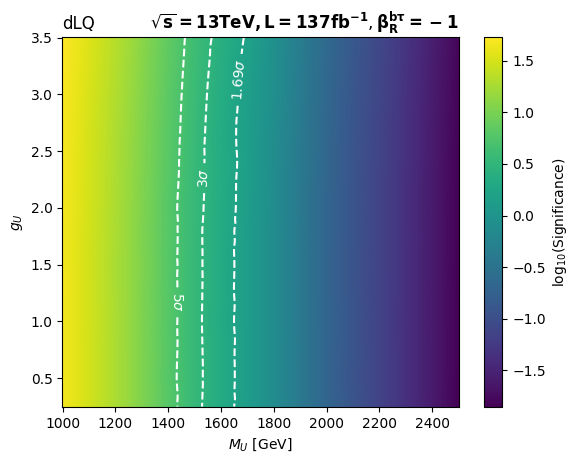

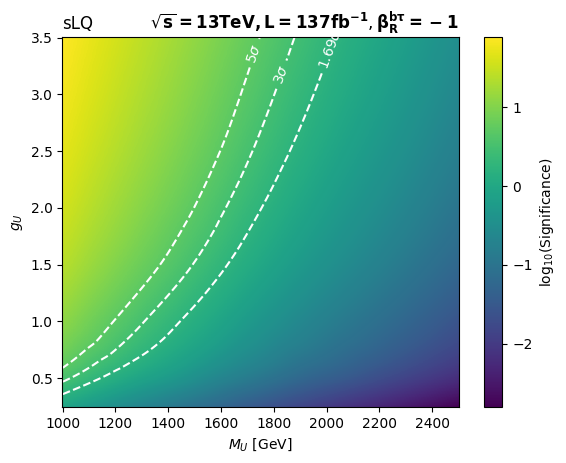

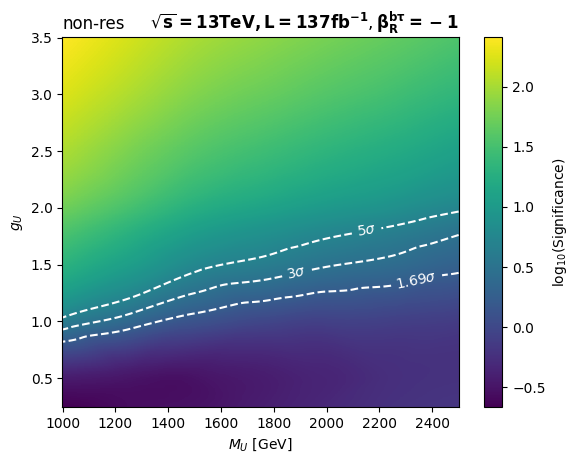

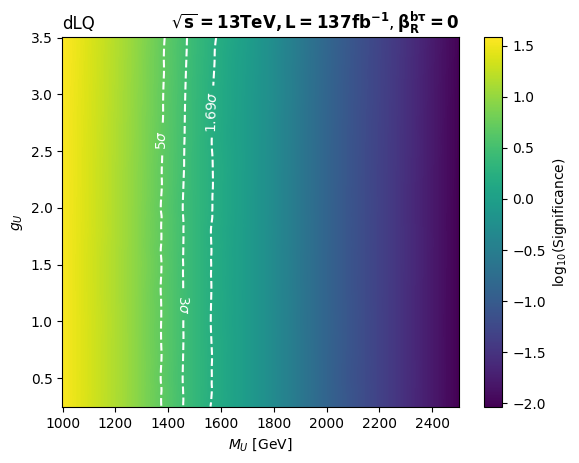

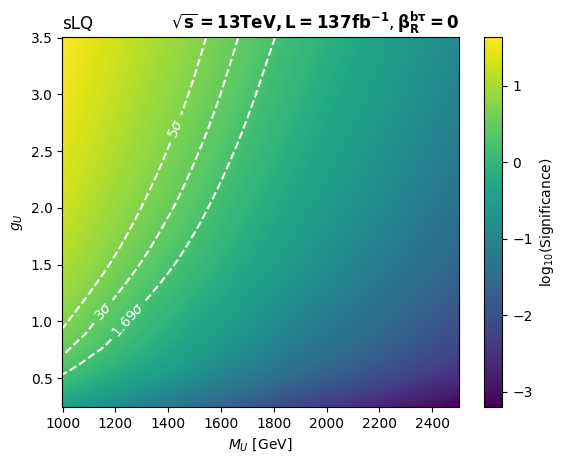

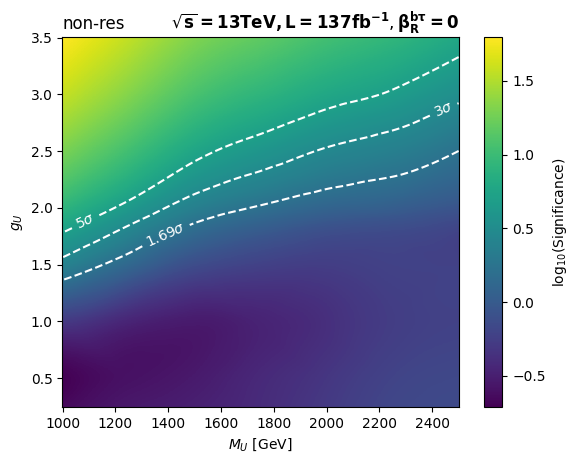

In [8]:
titulos_izquierda = {'Lq_Lq' : 'dLQ', 'tau_Lq' : 'sLQ', 'tau_tau' : 'non-res'}
betard_title = {'wRHC': r'$, \mathbf{\beta_{R}^{b \tau} = -1}$', 'woRHC': r'$, \mathbf{\beta_{R}^{b \tau} = 0}$'}

for betard in betards:
    for key in Significances[betard]:
        Data = pd.DataFrame.from_dict(Significances[betard][key])
        Data_interpolate = smooth(Data, log = True)
        plot_heatmap(Data_interpolate,
                     curvas_de_nivel = {np.log10(1.69) : r'$1.69 \sigma$', np.log10(3): r'$3 \sigma$', np.log10(5): r'$5 \sigma$'},
                     titulos = {'titulo':'','titulo_izquierda': titulos_izquierda[key],'titulo_derecha': r'$\mathbf{\sqrt{s} = 13 TeV, L = 137 fb^{-1}}$' + betard_title[betard] ,'x_label': r'$M_{U}$ [GeV]', 'y_label': r'$g_U$', 'cbar_label': r'$\log_{10}$(Significance)'},
                     PDF_name = f'Tables_and_Heatmaps/{key}_{betard}.png')

In [9]:
!rm -rf Heatmap_Utilities/